In [32]:
from astropy.io import fits
import numpy as np
import matplotlib.pyplot as plt
import aplpy
from astropy.modeling import models, fitting
from astropy import wcs
import wcsaxes
%matplotlib inline

#import ROOT
from header_utils import verify_header
import aplpy.regions
import pyregion
#from astropy import pyregion

from os import path, listdir
import warnings


In [3]:
#warnings.filterwarnings('module')
home = path.expanduser("~")
gc_dir = home + "/Dropbox/GalacticCenter"
fitsdir = gc_dir +"/fits/"
filename = fitsdir + "/stage6_wobble_disp5t_skymap_subtraction_center_SgrA_maps.fits"

update_file = fits.open(filename, mode='update')
#update_header = fits.getheader(filename)
data_up, update_header = fits.getdata(filename, header=True)
print(type(update_header))

#verify_header(update_header) # could not find RADECSYS
print(update_header)
update_file.close()

#fits.writeto(filename, data_up, update_header, clobber=False)


<class 'astropy.io.fits.header.Header'>
SIMPLE  =                    T / conforms to FITS standard                      BITPIX  =                  -32 / array data type                                NAXIS   =                    2 / number of array dimensions                     NAXIS1  =                  240                                                  NAXIS2  =                  240                                                  EXTNAME = 'sigMap  '           / Extension name                                 EQUINOX =                2000. / Epoch of coordinate system                     CTYPE1  = 'GLON-TAN'           / Axis type for dim 1 (GL)                       CRVAL1  =     359.944208708049 / Sky coord of 1st axis (deg)                    CRPIX1  =                 120. / Reference point of pixel location axis 1       CDELT1  =               -0.025 / X degrees per pixel                            CTYPE2  = 'GLAT-TAN'           / Axis type for dim 2 (GB)                       

In [4]:
data_fixed, header_fixed = fits.getdata(fitsdir + "release_galactic_skymap_fixed_head.fits", header=True)
#print(header_fixed)


the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]
the RADECSYS keyword is deprecated, use RADESYSa.
/Users/mbuchove/Programs/Anaconda3/anaconda/lib/python3.5/site-packages/aplpy/normalize.py:115: RuntimeWarning: invalid value encountered in less
  negative = result < 0.
/Users/mbuchove/Programs/Anaconda3/anaconda/lib/python3.5/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


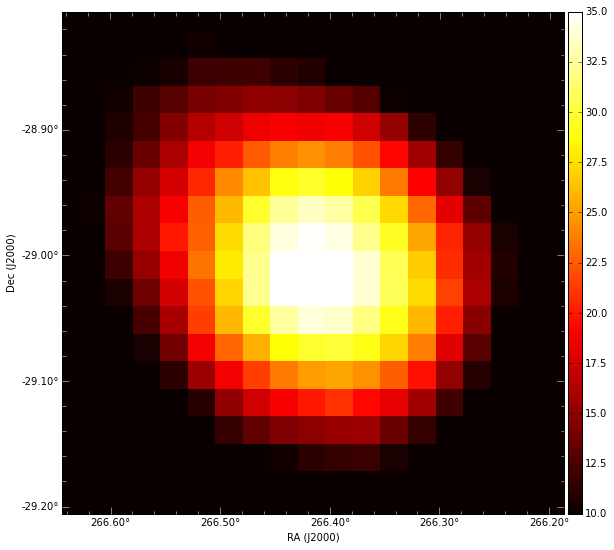

In [5]:
fig = aplpy.FITSFigure(fitsdir + "release_skymap.fits")
fig.show_colorscale(vmin=10, vmax=35, cmap='hot')
fig.show_colorbar()
fig.set_tick_labels_xformat('dd.dd')
fig.set_tick_labels_yformat('dd.dd')
#fig.recenter(0,0,width=1,height=1)
fig.recenter(266.415, -29.006, width=0.4, height=0.4)
#fig.show_circles(266.5, -29, 0.1)
#fig.add_label(266.5, -29, "test", color='white', fontsize='24')

In [6]:
fil = fitsdir + "release_galactic_skymap.fits"
wcsGC = wcs.WCS(fil)
data  = fits.getdata(fil)
data[120,120]

1018.2681

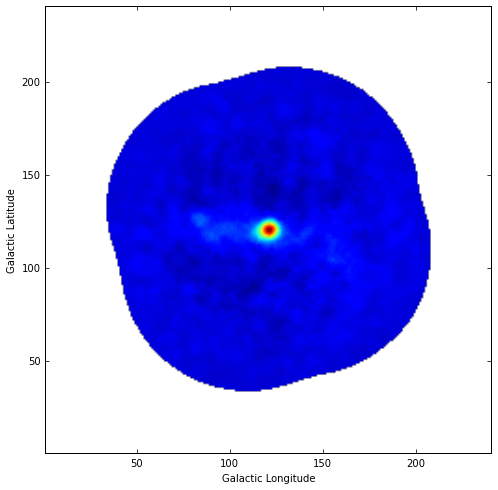

In [7]:
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(1, 1, 1, projection = wcsGC)
plt.imshow(data, origin='lower')
ax.set_xlabel("Galactic Longitude")
ax.set_ylabel("Galactic Latitude")

#ax.cla()
#ax.set_xlim(110,128)
#ax.set_ylim(112,127)
#fig.add_subplot?


In [8]:
HDUlist = fits.open(fitsdir + "release_skymap.fits")
HDUlist.info()
hdu_2 = HDUlist[2]

excess_data_x = HDUlist[2].data
array1 = excess_data_x.copy()
print(array1)
print(array1[120,120])

print(type(HDUlist))
print(type(HDUlist[2]))


Filename: /Users/mbuchove/Dropbox/GalacticCenter/fits/release_skymap.fits
No.    Name         Type      Cards   Dimensions   Format
0    PRIMARY     PrimaryHDU      17   ()              
1    SignificanceSkyMap  ImageHDU        18   (274, 274)   float32   
2    ExcessSkyMap  ImageHDU        18   (274, 274)   float32   
[[ nan  nan  nan ...,  nan  nan  nan]
 [ nan  nan  nan ...,  nan  nan  nan]
 [ nan  nan  nan ...,  nan  nan  nan]
 ..., 
 [ nan  nan  nan ...,  nan  nan  nan]
 [ nan  nan  nan ...,  nan  nan  nan]
 [ nan  nan  nan ...,  nan  nan  nan]]
10.8983
<class 'astropy.io.fits.hdu.hdulist.HDUList'>
<class 'astropy.io.fits.hdu.image.ImageHDU'>


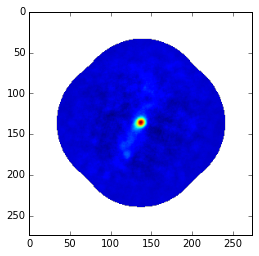

In [9]:
plt.imshow(excess_data_x)
#matplotlib.pyplot.colorbar()

In [10]:
print("Max: ",np.std(excess_data_x))

Max:  nan


In [11]:
print(models.Gaussian2D)
symGauss = models.Gaussian2D(amplitude=30,x_mean=266,y_mean=-28,x_stddev=.17,y_stddev=.17)


<class 'astropy.modeling.functional_models.Gaussian2D'>
Name: Gaussian2D
Inputs: ('x', 'y')
Outputs: ('z',)
Fittable parameters: ('amplitude', 'x_mean', 'y_mean', 'x_stddev', 'y_stddev', 'theta')


In [12]:
pinit2 = models.Gaussian2D(x_mean=5, y_mean=5, x_stddev=2, y_stddev=2, theta=0.)
pinit = models.Gaussian2D(amplitude=30, x_mean=2.5, y_mean=2.5, x_stddev=0.1, y_stddev=0.1, theta=0.)
pinit3 = pinit + pinit2
fit_p = fitting.LevMarLSQFitter()


In [13]:
#fit_p?
#fit_p.supported_constraints?
#newmodel = fit_p(pinit, excess_data)

In [14]:
pinit.theta.fixed = True
pinit.amplitude.min = 0.
pinit.bounds


{'amplitude': (0.0, None),
 'theta': (None, None),
 'x_mean': (None, None),
 'x_stddev': (None, None),
 'y_mean': (None, None),
 'y_stddev': (None, None)}

In [15]:
data, header = fits.getdata(fitsdir+"release_skymap.fits", header=True)
np.nanmax(data)
np.where(data == np.nanmax(data))
data2 = np.nan_to_num(data)


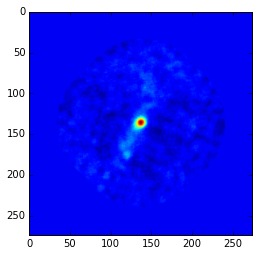

In [16]:
plt.imshow(data2)

In [17]:
#np.floor(fig.world2pixel(266.5, -29))
#w.wcs_pix2world(100,100)
#w.printwcs()

the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]
the RADECSYS keyword is deprecated, use RADESYSa.
INFO:astropy:Auto-setting vmin to -1.202e+02
INFO:astropy:Auto-setting vmax to  6.234e+02
/Users/mbuchove/Programs/Anaconda3/anaconda/lib/python3.5/site-packages/aplpy/normalize.py:115: RuntimeWarning: invalid value encountered in less
  negative = result < 0.
/Users/mbuchove/Programs/Anaconda3/anaconda/lib/python3.5/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


INFO: Auto-setting vmin to -1.202e+02 [aplpy.core]
INFO: Auto-setting vmax to  6.234e+02 [aplpy.core]


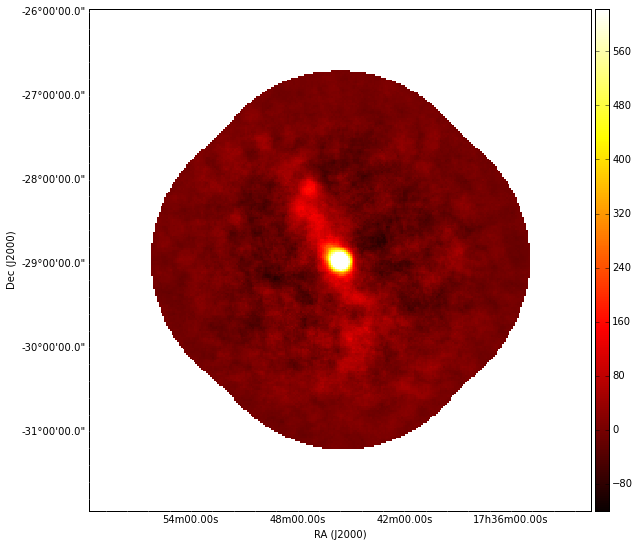

In [18]:
figure_SgrA_excess = aplpy.FITSFigure(hdu_2)
figure_SgrA_excess.show_colorscale(cmap='hot')
figure_SgrA_excess.show_colorbar()
#aplpy.FITSFigure?
HDUlist.close()

In [19]:
skymap_data, skymap_header = fits.getdata(fitsdir+"simpleFITStestRalph.fits", header = True)

excess_data_N = np.nan_to_num(skymap_data)

# Sgr A* middle bins
print(excess_data_N[119:123,119:122])

print(skymap_header)
# G0.9+0.1
print(skymap_data[148:151,159:161])

[[ 0.69483322  1.36599612  0.83247882]
 [ 0.80319762  1.44784331  1.15611184]
 [ 1.80984199  1.71381021  1.23525143]
 [ 1.75530291  1.21368682  1.31682861]]
XTENSION= 'IMAGE   '           / IMAGE extension                                BITPIX  =                  -32 / number of bits per data pixel                  NAXIS   =                    2 / number of data axes                            NAXIS1  =                  319 / length of data axis 1                          NAXIS2  =                  319 / length of data axis 2                          PCOUNT  =                    0 / required keyword; must = 0                     GCOUNT  =                    1 / required keyword; must = 1                     EXTNAME = 'SignificanceSkyMap' / Extension name                                 RADECSYS= 'FK5     '           / WCS for this file                              EQUINOX =                2000. / Epoch of coordinate system                     CTYPE1  = 'RA---TAN'           / Axis type 

In [20]:
def setup_sig_fits(fig):
    """set standard options for sig map"""
    fig.show_colorscale(smooth=1, interpolation='spline16')
    #plasma 
    fig.show_colorbar()
    cbar = fig_apl.colorbar
    cbar.set_axis_label_text('Significance')
    fig_apl.tick_labels.set_xformat('dd.d')
    fig_apl.tick_labels.set_yformat('dd.d')

# end set_sig_fits 


INFO:astropy:Auto-setting vmin to -4.360e+00
INFO:astropy:Auto-setting vmax to  7.348e+00


INFO: Auto-setting vmin to -4.360e+00 [aplpy.core]
INFO: Auto-setting vmax to  7.348e+00 [aplpy.core]


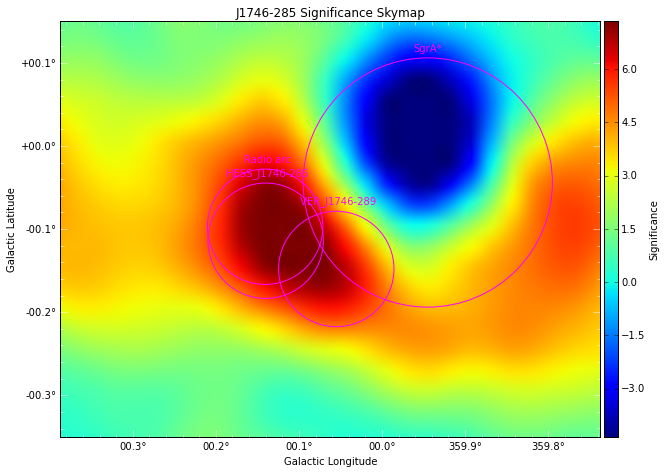

In [31]:
sig_filename_fits = fitsdir+"stage6_wobble_disp5t_skymap_subtraction_center_SgrA_maps.fits"
fig_apl = aplpy.FITSFigure(sig_filename_fits)
fig_apl.set_title("J1746-285 Significance Skymap")
setup_sig_fits(fig_apl) 

fig_apl.show_regions(fitsdir+"radio_arc_exclusions.reg")
#fig_apl.show_regions(fitsdir+"stage6_wobble_disp5t_skymap_subtraction_center_SgrA_maps_ds9_full.reg")

fig_apl.recenter(0.0625, -0.1, width=0.65, height=0.5) # 1746
#fig_apl.recenter(-0.25, -0.25, width=3.5, height=1.5) # center
#fig_apl.recenter(0.7, -0.05, width=0.5, height=0.5) # B2

#plt.savefig(gc_dir+"/plots/skymaps/J1746-285_radioArc_subtracted.png")
#fig_apl.save('SgrB2_sigmap.pdf')

#fig_apl.show_contour(data)


the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]
the RADECSYS keyword is deprecated, use RADESYSa.
INFO:astropy:Auto-setting vmin to -4.978e+00
INFO:astropy:Auto-setting vmax to  2.017e+01
/Users/mbuchove/Programs/Anaconda3/anaconda/lib/python3.5/site-packages/aplpy/normalize.py:115: RuntimeWarning: invalid value encountered in less
  negative = result < 0.
/Users/mbuchove/Programs/Anaconda3/anaconda/lib/python3.5/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


INFO: Auto-setting vmin to -4.978e+00 [aplpy.core]
INFO: Auto-setting vmax to  2.017e+01 [aplpy.core]
INFO

INFO:astropy:Auto-setting vmin to -6.690e+00
        Use the `.cards` attribute instead. [pyregion.wcs_helper]
        Use the `.cards` attribute instead.
        Use the `.cards` attribute instead. [pyregion.wcs_helper]
        Use the `.cards` attribute instead.


: Auto-setting vmin to -6.690e+00 [aplpy.core]


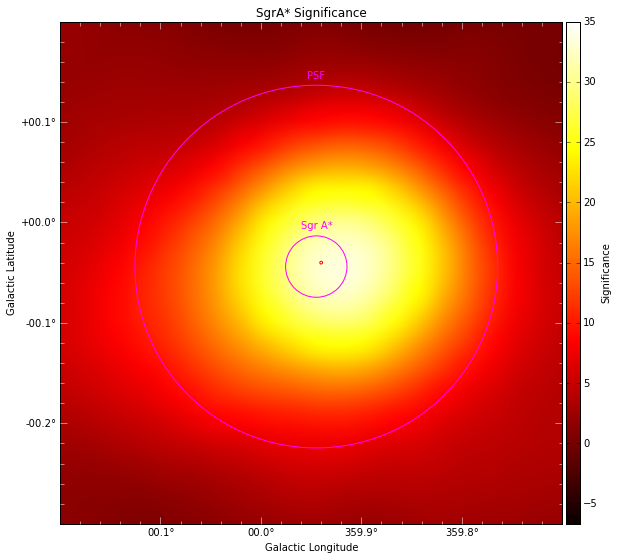

In [22]:
sig_filename_fits = fitsdir + "SgrA_disp5t_excludeMore_skymap_4tels_s6.fits"
fig_apl = aplpy.FITSFigure(sig_filename_fits)
setup_sig_fits(fig_apl)
fig_apl.show_colorscale(cmap='hot', vmax=35., smooth=1, interpolation='spline16')
fig_apl.recenter(359.95, -0.05, width=0.5, height=0.5)
fig_apl.set_title("SgrA* Significance")

fig_apl.show_regions(fitsdir+"SgrA_position_uncertainty.reg")
fig_apl.show_markers(359.94, -0.04, marker='.') # radio position
#, fillstyles='full')  


INFO:astropy:Auto-setting vmin to -4.978e+00
INFO:astropy:Auto-setting vmax to  2.017e+01


INFO: Auto-setting vmin to -4.978e+00 [aplpy.core]
INFO: Auto-setting vmax to  2.017e+01 [aplpy.core]
INFO

INFO:astropy:Auto-setting vmin to -4.190e+00


: Auto-setting vmin to -4.190e+00 [aplpy.core]


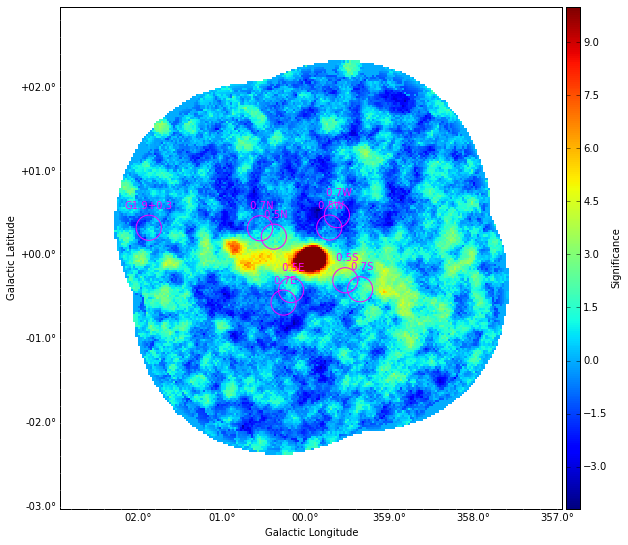

In [23]:
# look at G1.9
warnings.filterwarnings('ignore')
sig_filename_fits = fitsdir + "SgrA_disp5t_excludeMore_skymap_4tels_s6.fits"
fig_apl = aplpy.FITSFigure(sig_filename_fits)
setup_sig_fits(fig_apl)
fig_apl.show_colorscale(vmax=10)
#fig_apl.recenter(359.95, -0.05, width=3., height=3.)
#fig_apl.set_title("Galactic Center Significance")
fig_apl.show_regions(fitsdir+"G1.9+0.3_and_wobbles_ds9.reg")

plt.savefig(gc_dir+"/plots/skymaps/GC_wobbles_G1.9+0.3.png")

#fig_apl.show_circles(100, 100, 25)


INFO:astropy:Auto-setting vmin to -4.978e+00
INFO:astropy:Auto-setting vmax to  2.017e+01


INFO: Auto-setting vmin to -4.978e+00 [aplpy.core]
INFO: Auto-setting vmax to  2.017e+01 [aplpy.core]


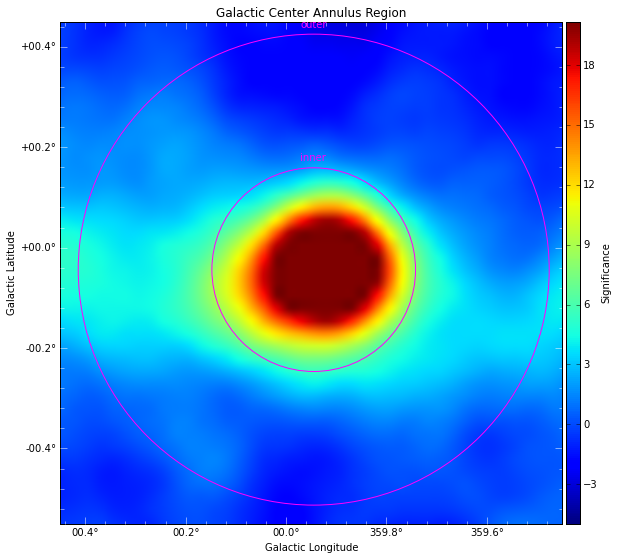

In [24]:
warnings.filterwarnings('ignore')
#sig_filename_fits = fitsdir+"release_galactic_skymap_fixed_head.fits"
sig_filename_fits = fitsdir + "SgrA_disp5t_excludeMore_skymap_4tels_s6.fits"
fig_apl = aplpy.FITSFigure(sig_filename_fits)
fig_apl.set_title("Galactic Center Annulus Region")
setup_sig_fits(fig_apl)
#fig_apl.show_colorscale(smooth=1)
#cbar = fig_apl.show_colorbar()
fig_apl.show_regions(fitsdir+"GC_annulus_region.reg")

fig_apl.recenter(359.95, -0.05, width=1.0, height=1.0) # center


INFO:astropy:Auto-setting vmin to -4.024e+00
INFO:astropy:Auto-setting vmax to  9.231e+00


INFO: Auto-setting vmin to -4.024e+00 [aplpy.core]
INFO: Auto-setting vmax to  9.231e+00 [aplpy.core]


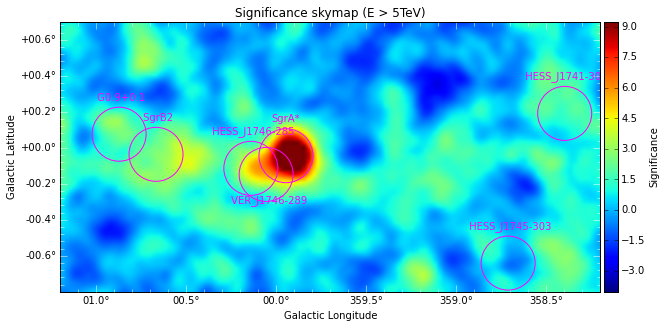

In [25]:
fig_apl = aplpy.FITSFigure(fitsdir+"/SgrA_disp5t_E5000_4tels_skymap.fits")
setup_sig_fits(fig_apl)
fig_apl.set_title("Significance skymap (E > 5TeV)")
#fig_apl.show_colorscale(vmax=7.)
fig_apl.recenter(359.7, -0.05, width=3., height=1.5)

fig_apl.show_regions(fitsdir+"/stage6_wobble_disp5t_skymap_subtraction_center_SgrA_maps_ds9_full.reg")

#plt.savefig(gc_dir+"/plots/skymaps/SgrA_sigmap_E5000_fits.png")




<h2>Radio Data

INFO:astropy:Auto-setting vmin to -2.157e+01
INFO:astropy:Auto-setting vmax to  1.389e+02


INFO: Auto-setting vmin to -2.157e+01 [aplpy.core]
INFO: Auto-setting vmax to  1.389e+02 [aplpy.core]


Exception: Cannot (yet) convert between unknown, none and galactic, none

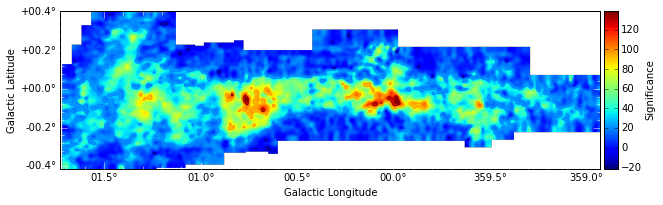

In [26]:
filebase = home+"/Documents/GC_material/NRO_radio_fits_data/GC.CS10.10.FITS.files/A10MAP"

data, header = fits.getdata(filebase+".1.FITS", header=True)
for i in range(2, 41):
    data = data + fits.getdata(filebase+'.'+str(i)+".FITS")

filename = filebase + "_sum.fits"
#fits.writeto(filename, data, header, clobber=False)
    
fig_apl = aplpy.FITSFigure(filename)
setup_sig_fits(fig_apl)

fig_apl.show_contour(data)


In [ ]:
char = 'V'
filedir = home + "/Documents/GC_material/NRO_radio_fits_data/GC.CS10."+char+"V.FITS.files/"
filelist = listdir(filedir)



#data, header = fits.getdata(filedir+filelist[0], header=True)
#for file in filelist[1:]:
#    data = data + fits.getdata(filedir+file)

filename = filedir + char + "VMAP_sum.fits"
#fits.writeto(filename, data, header, clobber=False)
    
fig_apl = aplpy.FITSFigure(filename)
#setup_sig_fits(fig_apl)
fig_apl.show_colorscale(smooth=1, interpolation='spline16')
fig_apl.show_colorbar()

#fig_apl.show_contour(data)


In [ ]:
fig_apl.show_colorscale(smooth=1, interpolation='spline16')

In [ ]:
fig.show_colorscale(smooth=1, interpolation='spline16')
    #plasma 
fig.show_colorbar()
cbar = fig_apl.colorbar
cbar.set_axis_label_text('Significance')
fig_apl.tick_labels.set_xformat('dd.d')
fig_apl.tick_labels.set_yformat('dd.d')

In [ ]:
fig_apl = aplpy.FITSFigure(home+"/Documents/GC_material/NRO_radio_fits_data/GCCS.fits", slices=[87])
setup_sig_fits(fig_apl)
